## Q1: 

First, the libraries that will allow us to read and manipulate the data are imported

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  


Now we read the data files: Expense Amount Data.csv and Expense Data.csv (Assuming they are in the same directory)

In [2]:
Expense_Amount_Data=pd.read_csv('Expense Amount Data.csv')
Expense_Data=pd.read_csv('Expense Data.csv')

In [3]:
Expense_Amount_Data.head()

,"Expense Code,Expense Amount (SAR)"
0,"10532,4.46"
1,"10640,6.84"
2,"11053,0.36"
3,"11291,2.47"
4,"11436,1.7"


In [4]:
Expense_Data.head()

,"Expense Code,Month,Expense Quantity,Government Entity",Unnamed: 1
0,"10003,42948,1530,Ministry of Education",NaN
1,"10003,42979,3060,Ministry of Education",NaN
2,"10007,42917,1792,Ministry of Health",NaN
3,"10007,42979,2048,Ministry of Health",NaN
4,"10007,43132,1024,Ministry of Health",NaN


We notice that all columns' values are merged in one column, so we do the following to fix that:

In [5]:
Expense_Amount_Data['Expense Code']=Expense_Amount_Data['Expense Code,Expense Amount (SAR)'].apply(lambda x: x.split(',')[0])
Expense_Amount_Data['Expense Amount (SAR)']=Expense_Amount_Data['Expense Code,Expense Amount (SAR)'].apply(lambda x: x.split(',')[1])

In [6]:
Expense_Amount_Data=Expense_Amount_Data[['Expense Code','Expense Amount (SAR)']]

In [7]:
Expense_Data['Expense Code']=Expense_Data['Expense Code,Month,Expense Quantity,Government Entity'].apply(lambda x: x.split(',')[0])
Expense_Data['Month']=Expense_Data['Expense Code,Month,Expense Quantity,Government Entity'].apply(lambda x: x.split(',')[1])
Expense_Data['Expense Quantity']=Expense_Data['Expense Code,Month,Expense Quantity,Government Entity'].apply(lambda x: x.split(',')[2])
Expense_Data['Government Entity']=Expense_Data['Expense Code,Month,Expense Quantity,Government Entity'].apply(lambda x: x.split(',')[3])

In [8]:
Expense_Data=Expense_Data[['Expense Code','Month','Expense Quantity','Government Entity']]

In [9]:
Expense_Amount_Data.head()

,Expense Code,Expense Amount (SAR)
0,10532,4.46
1,10640,6.84
2,11053,0.36
3,11291,2.47
4,11436,1.7


In [10]:
Expense_Data.head()

,Expense Code,Month,Expense Quantity,Government Entity
0,10003,42948,1530,Ministry of Education
1,10003,42979,3060,Ministry of Education
2,10007,42917,1792,Ministry of Health
3,10007,42979,2048,Ministry of Health
4,10007,43132,1024,Ministry of Health


Now we join the two datasets to be able to perform the analysis (in order to have Expense Amount (SAR) and quantity in one table

In [11]:
merged_data=Expense_Amount_Data.merge(Expense_Data, on='Expense Code')

In [12]:
merged_data.head()

,Expense Code,Expense Amount (SAR),Month,Expense Quantity,Government Entity
0,10532,4.46,42826,15216,Ministry of Housing
1,10532,4.46,42887,5706,Ministry of Housing
2,10532,4.46,43070,6340,Ministry of Housing
3,10532,4.46,43009,13314,Ministry of Housing
4,10532,4.46,43191,5072,Ministry of Housing


Here we notice that the 'Month' values need to be transformed to a proper date format, so we save the file and use microsoft excel to do the transformation

In [13]:
merged_data.to_csv('merged_data.csv', index=None)

After applying the trasformation, we read the transformed file:

In [14]:
merged_data=pd.read_csv('merged_data.csv')

In [15]:
merged_data.head()

,Expense Code,Expense Amount (SAR),Month,Expense Quantity,Government Entity
0,10532,4.46,4/1/2017,15216,Ministry of Housing
1,10532,4.46,6/1/2017,5706,Ministry of Housing
2,10532,4.46,12/1/2017,6340,Ministry of Housing
3,10532,4.46,10/1/2017,13314,Ministry of Housing
4,10532,4.46,4/1/2018,5072,Ministry of Housing


In [16]:
len(merged_data)

17085

The dataset contains 17085 record

Now, let's analyze this dataset and look at the values in each columns to make sure it has no issues.

In [17]:
merged_data['Expense Code'].value_counts().head()

12565    56
2470     35
45       35
2757     35
566      33
Name: Expense Code, dtype: int64

These are the top values in the "Expense Code" column. Now, let's make sure that this code is numeric and follows the standard.

In [18]:
merged_data['Expense Code']=merged_data['Expense Code'].astype(int)

all good, let's see "Expense Amount (SAR)" column

In [19]:
merged_data['Expense Amount (SAR)'].describe()

count    17085.000000
mean         5.590861
std          2.940233
min          0.010000
25%          3.060000
50%          5.670000
75%          8.060000
max         10.990000
Name: Expense Amount (SAR), dtype: float64

we used describe() to see the distribution of data and make sure they are numeric and no missing values

all good, let's see "Month" column and make sure no missing values

In [20]:
merged_data[merged_data['Month'].isnull()]

,Expense Code,Expense Amount (SAR),Month,Expense Quantity,Government Entity


In [21]:
merged_data['Month'].value_counts()

6/1/2017       1445
2/1/2018       1382
9/1/2017       1366
7/1/2017       1359
12/1/2017      1320
8/1/2017       1286
11/1/2017      1279
5/1/2018       1278
1/1/2018       1207
3/1/2018       1063
10/1/2017      1054
5/1/2017       1051
4/1/2017        997
4/1/2018        996
8/1/2017000       1
9/1/2017000       1
Name: Month, dtype: int64

As can be seen from the above results we have two incorrect dates '9/1/2017000' and '8/1/2017000', we need to transform them to the correct format.

In [22]:
merged_data['Month']=merged_data['Month'].replace('9/1/2017000','9/1/2017')
merged_data['Month']=merged_data['Month'].replace('8/1/2017000','8/1/2017')

now, let's convert the type to datetime

In [23]:
merged_data['Month']=pd.to_datetime(merged_data['Month'])

all good, lets see Expense Quantity

In [24]:
merged_data['Expense Quantity'].describe()

count     17083
unique     4389
top         120
freq        115
Name: Expense Quantity, dtype: object

we see a missing values here. since there are a few records we can drop them. other solution is to replace them with the average maybe or use a model to predict their values..

In [25]:
merged_data=merged_data[merged_data['Expense Quantity'].notnull()]

now let's make sure that all values are numeric

In [26]:
all (str(s).replace('.','').isdigit() for s in merged_data['Expense Quantity'])

False

it seems that this columns contains non numeric values, let's check

In [27]:
for s in merged_data['Expense Quantity']:
    if(not str(s).replace('.','').isdigit()):
        print(s)
    

-23454
xxx
-3432
xxx
-560


here we see a negative values and 'xxx', we will assume that the negative values is just an entry error and we will remove the negative sign. and we will drop records with 'xxx' values..

In [28]:
merged_data['Expense Quantity']=merged_data['Expense Quantity'].replace('-23454','23454')
merged_data['Expense Quantity']=merged_data['Expense Quantity'].replace('-3432','3432')
merged_data['Expense Quantity']=merged_data['Expense Quantity'].replace('-560','560')

In [29]:
merged_data=merged_data[merged_data['Expense Quantity']!='xxx']

In [30]:
merged_data['Expense Quantity']=merged_data['Expense Quantity'].astype(float)

In [31]:
merged_data['Expense Quantity'].describe()

count    1.708100e+04
mean     1.117629e+04
std      1.580491e+05
min      1.000000e+00
25%      2.460000e+02
50%      9.450000e+02
75%      3.520000e+03
max      1.096966e+07
Name: Expense Quantity, dtype: float64

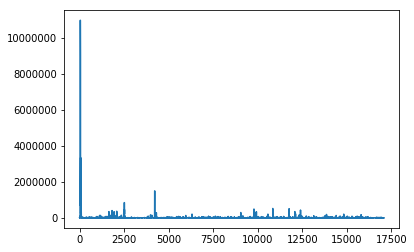

In [32]:
plt.ticklabel_format(style='plain', axis='y')
merged_data['Expense Quantity'].plot()

there might be an outliars here, we can detect them mathematically using z-score for example and it is "the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured." but here we choose not to and we assume all values are correct and important.

all good now, let's move to 'Government Entity' column and see how many record for each gov entity

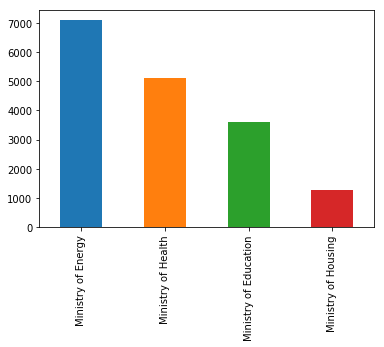

In [33]:
merged_data['Government Entity'].value_counts().plot(kind='bar')

## Q2: 

In [34]:
# to get 2017 data
merged_data_2017=merged_data[(merged_data['Month']>='2017') & (merged_data['Month']<'2018')]

In [35]:
# group by and take the sum of quantity in each month in 2017
merged_data_2017_grouped=merged_data_2017.groupby('Month').agg({'Expense Quantity':'sum'}).reset_index()

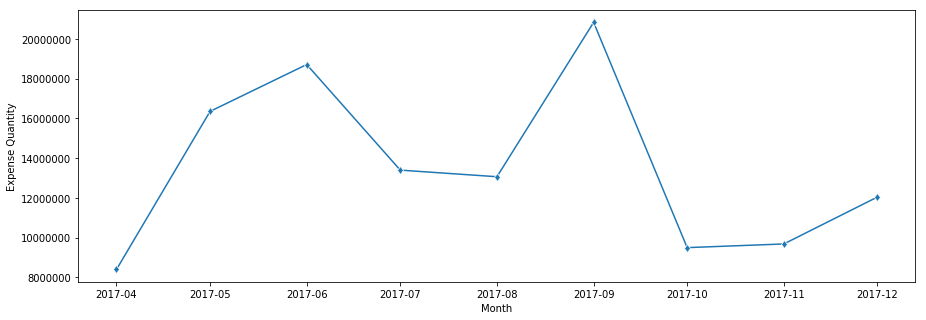

In [36]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(15,5))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(x='Month',y='Expense Quantity', data=merged_data_2017_grouped, marker='d')

Now let's see the trend by gov entity ...

In [37]:
d=merged_data_2017.groupby(['Month','Government Entity']).agg({'Expense Quantity':'sum'}).reset_index()

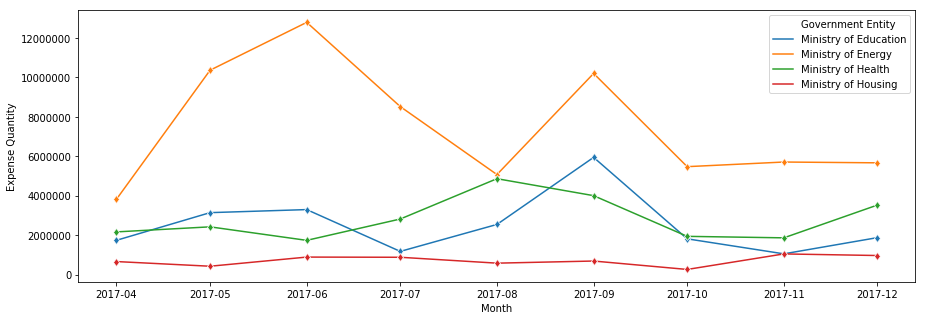

In [38]:
fig, ax1 = plt.subplots(figsize=(15,5))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(x='Month',y='Expense Quantity', data=d, hue='Government Entity', marker='d')

## Q3: 

here we assume that the total value of how much spent is Expense Amount (SAR) * Expense Quantity. Since we have already merged the two datasets it is straightforward..

In [39]:
merged_data['Total Expense']=merged_data['Expense Amount (SAR)'] * merged_data['Expense Quantity']

In [40]:
q3=merged_data.groupby('Government Entity').agg({'Total Expense':'sum'}).reset_index()

Text(0,0.5,'Total Expense (SAR)')

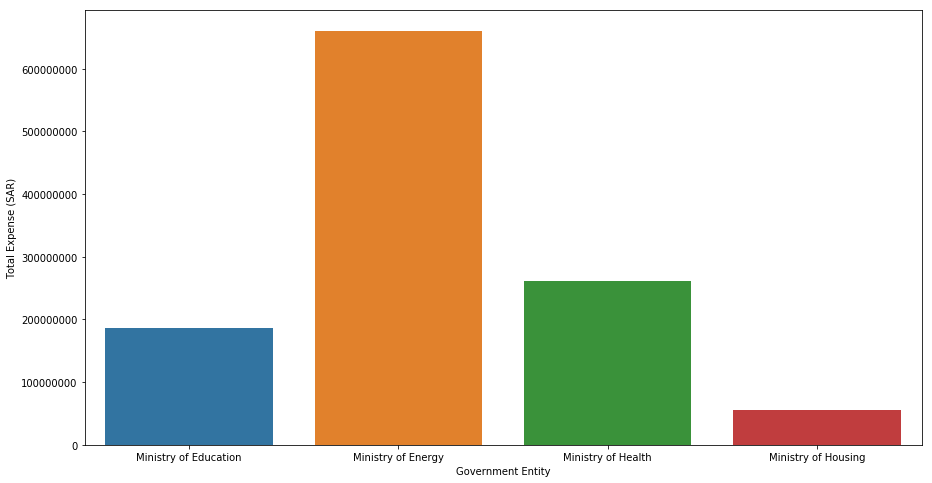

In [41]:
fig, ax1 = plt.subplots(figsize=(15,8))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x='Government Entity',y='Total Expense', data=q3)
plt.ylabel('Total Expense (SAR)')

## Q4:

I would intergrate this dataset with some other datasets to better understand the behaviour of demand. For example, I would merge it with the year calendar (start/end of school seasons for example) to capture patterns in the ministry of education demand. also hospital and medical center visits and check for corrolations with ministry of health deman. And so many other datasets.

## Q5:

Four main county's financial indicator have been selected:
1- GDP  per capita
2- Goods Export
3- Goods Import
4- Capital Account

these datasets have been collected from  https://www.worldbank.org/

### GDP per capita

Text(0,0.5,'GDP (US $)')

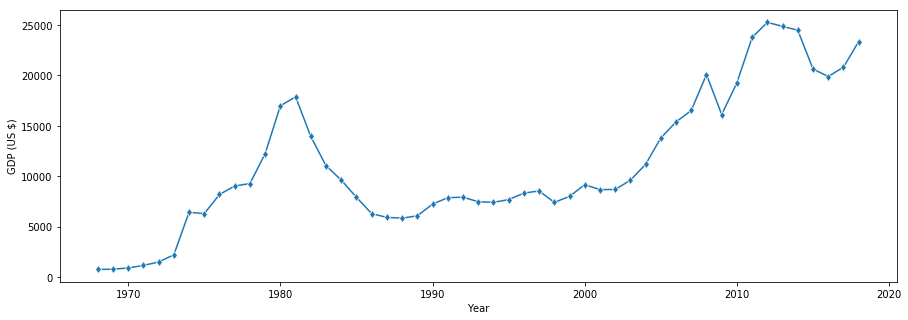

In [42]:
GDP=pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_713319.xls', skiprows=3)

GDP=GDP[GDP['Country Name']=='Saudi Arabia'].reset_index()

GDP=GDP.T.reset_index()[5:]

GDP.columns=['Year','GDP']

GDP=GDP.dropna()

GDP['GDP']=GDP['GDP'].astype(float)
GDP['Year']=GDP['Year'].astype(int)


fig, ax1 = plt.subplots(figsize=(15,5))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(x='Year',y='GDP', data=GDP, marker='d')
plt.ylabel('GDP (US $)')

### GOODS EXPORT

Text(0,0.5,'Goods Export (US $)')

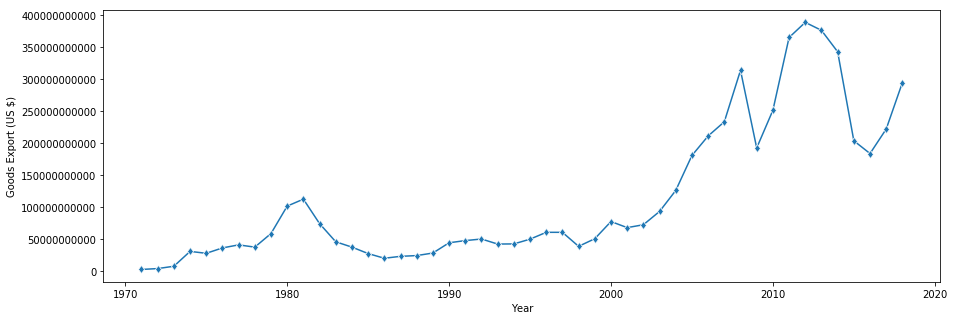

In [43]:
GOODS_EXPORT=pd.read_excel('API_BX.GSR.MRCH.CD_DS2_en_excel_v2_720333.xls', skiprows=3)

GOODS_EXPORT=GOODS_EXPORT[GOODS_EXPORT['Country Name']=='Saudi Arabia'].reset_index()

GOODS_EXPORT=GOODS_EXPORT.T.reset_index()[5:]

GOODS_EXPORT.columns=['Year','GOODS_EXPORT']

GOODS_EXPORT=GOODS_EXPORT.dropna()

GOODS_EXPORT['GOODS_EXPORT']=GOODS_EXPORT['GOODS_EXPORT'].astype(float)
GOODS_EXPORT['Year']=GOODS_EXPORT['Year'].astype(int)


fig, ax1 = plt.subplots(figsize=(15,5))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(x='Year',y='GOODS_EXPORT', data=GOODS_EXPORT, marker='d')
plt.ylabel('Goods Export (US $)')

### GOODS IMPORT

Text(0,0.5,'Goods Imports (US $)')

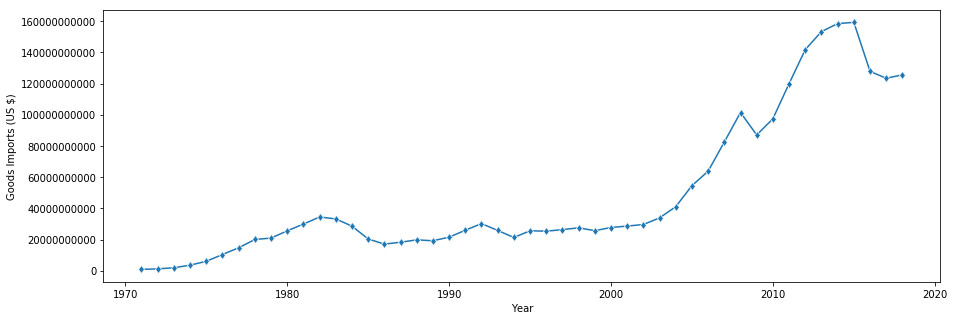

In [44]:
GOODS_IMPORT=pd.read_excel('API_BM.GSR.MRCH.CD_DS2_en_excel_v2_747180.xls', skiprows=3)

GOODS_IMPORT=GOODS_IMPORT[GOODS_IMPORT['Country Name']=='Saudi Arabia'].reset_index()

GOODS_IMPORT=GOODS_IMPORT.T.reset_index()[5:]

GOODS_IMPORT.columns=['Year','GOODS_IMPORT']

GOODS_IMPORT=GOODS_IMPORT.dropna()

GOODS_IMPORT['GOODS_IMPORT']=GOODS_IMPORT['GOODS_IMPORT'].astype(float)
GOODS_IMPORT['Year']=GOODS_IMPORT['Year'].astype(int)


fig, ax1 = plt.subplots(figsize=(15,5))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(x='Year',y='GOODS_IMPORT', data=GOODS_IMPORT, marker='d')
plt.ylabel('Goods Imports (US $)')

### capital account

Text(0,0.5,'capital account (US $)')

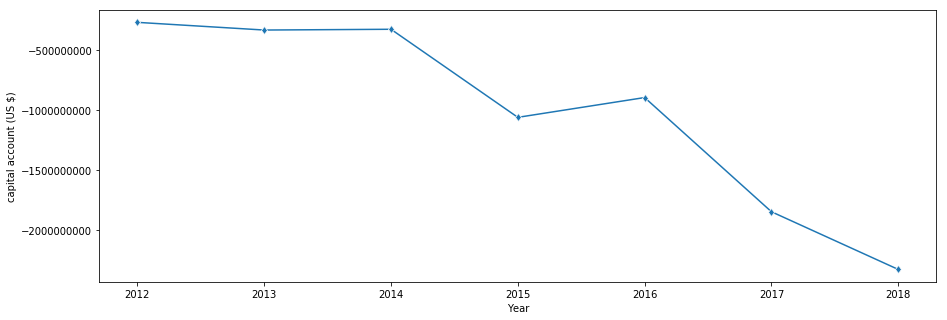

In [45]:
capital_account=pd.read_excel('API_BN.TRF.KOGT.CD_DS2_en_excel_v2_717414.xls', skiprows=3)

capital_account=capital_account[capital_account['Country Name']=='Saudi Arabia'].reset_index()

capital_account=capital_account.T.reset_index()[5:]

capital_account.columns=['Year','capital_account']

capital_account=capital_account.dropna()

capital_account['capital_account']=capital_account['capital_account'].astype(float)
capital_account['Year']=capital_account['Year'].astype(int)


fig, ax1 = plt.subplots(figsize=(15,5))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(x='Year',y='capital_account', data=capital_account, marker='d')
plt.ylabel('capital account (US $)')

# The End
-Riyadh Alnasser